In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting data

In [88]:
#Leer csv final
df_final = pd.read_csv(r'C:\Users\Germán\Github\ProyectoFinal\data\dffinal.csv')


Objetivo del proyecto:

1- Recomendaciones personalizadas para los clientes. (En el EDA hemos podido observar ciertas tendencias de mercado que son interesantes para generar recomedaciones según las características de los coches) </br>

**2- Predicciones precisas del precio del precio del coche deseado**

Aqui trabajaremos en identificar que variables vamos a utilizar para poder realizar un modelo de predicción que nos indique el valor estimado de un coche segun ciertas características.

In [89]:
df_final.columns

Index(['make', 'model', 'version', 'fuel', 'year', 'kms', 'power', 'shift',
       'price', 'location', 'publish_date', 'dealer_address',
       'dealer_zip_code', 'dealer_city', 'dealer_country_code', 'lat', 'long',
       'state'],
      dtype='object')

In [90]:
#Eliminar 'location', 'publish_date', 'dealer_address','dealer_zip_code', 'dealer_city', 'dealer_country_code', 'lat', 'long'
df_final = df_final.drop(['location', 'publish_date', 'dealer_address','dealer_zip_code', 'dealer_city', 'dealer_country_code', 'lat', 'long',"version","state"], axis=1)

In [91]:
df_final.isnull().sum()

make     0
model    0
fuel     0
year     0
kms      0
power    0
shift    0
price    0
dtype: int64

# Heat map

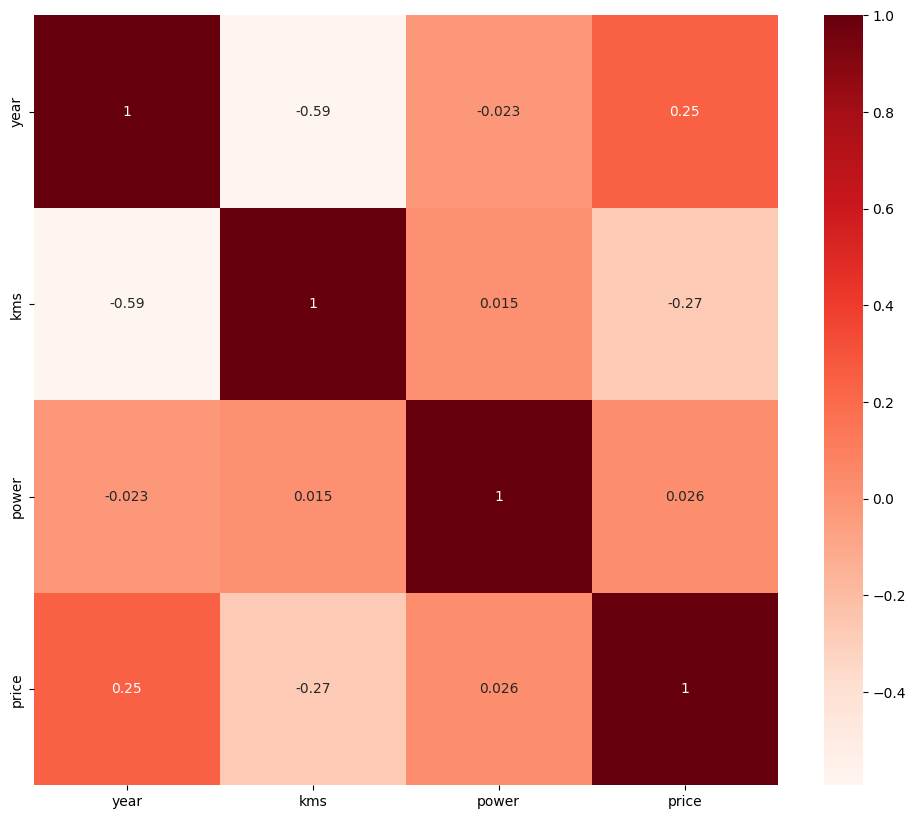

In [92]:
num_var = df_final.select_dtypes(include=[np.number]).columns

#Heat map de correlacion entre las num_var
plt.figure(figsize=(12, 10))
cor = df_final[num_var].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Encoding para ver correlacion de var categóricas

In [75]:
from sklearn.preprocessing import LabelEncoder

# Crear una copia del dataframe original para no modificarlo directamente
df_encoded = df_final.copy()

# Inicializar el LabelEncoder
le = LabelEncoder()

# Aplicar el LabelEncoder a las columnas 'fuel' y 'shift'
df_encoded['fuel'] = le.fit_transform(df_encoded['fuel'])
df_encoded['shift'] = le.fit_transform(df_encoded['shift'])

print(df_encoded.head())

   fuel  year      kms  power  shift  price
0     2  2022      5.0  110.0      1  22900
1     2  2022  24847.0  110.0      1  19990
2     0  2021  41356.0  120.0      0  18590
3     2  2022     11.0  110.0      1  22700
4     2  2022     11.0  110.0      1  22700


In [76]:
df_encoded.columns

Index(['fuel', 'year', 'kms', 'power', 'shift', 'price'], dtype='object')

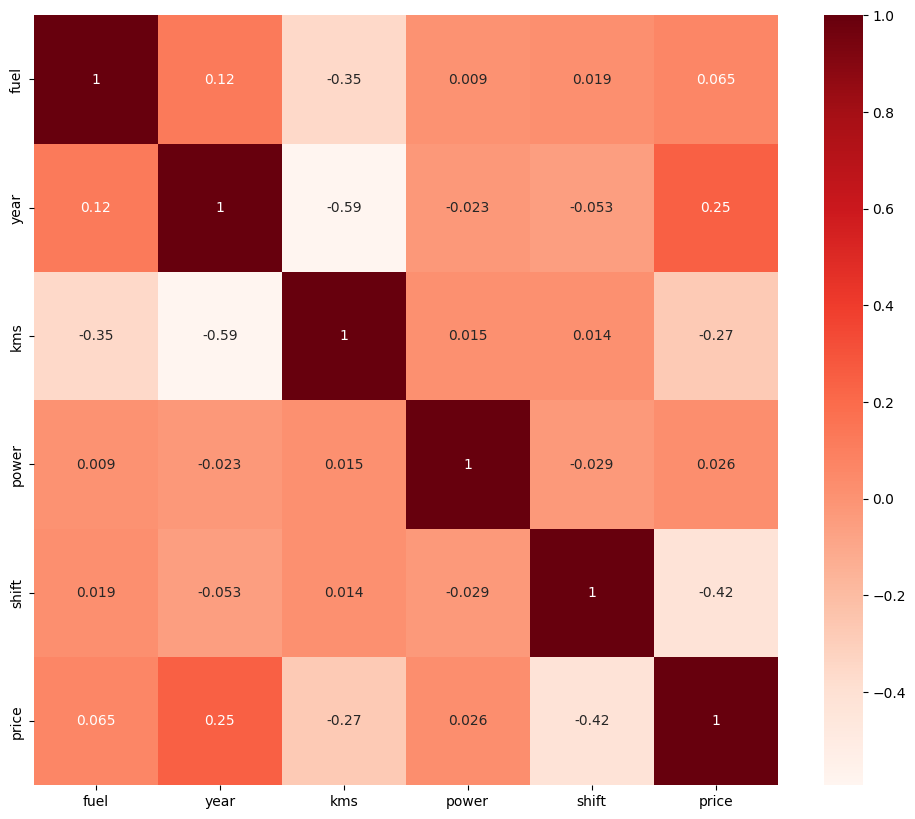

In [77]:
#Heat map de correlacion de df_encoded
plt.figure(figsize=(12, 10))
numeric_df_encoded = df_encoded.select_dtypes(include=[np.number])
cor = numeric_df_encoded.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

--------------------------------

In [94]:
from sklearn.preprocessing import OneHotEncoder

# Seleccionar las columnas a codificar
columns_to_encode = ['make', 'fuel', 'shift', 'model']

# Inicializar el OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')

# Ajustar y transformar los datos
encoded_features = ohe.fit_transform(df_final[columns_to_encode])

# Crear un DataFrame con las características codificadas
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(columns_to_encode))

# Concatenar el DataFrame original con el DataFrame codificado
df_final_encoded = pd.concat([df_final.drop(columns_to_encode, axis=1), encoded_df], axis=1)

print(df_final_encoded.head())

   year      kms  power  price  make_Alfa Romeo  make_Alpine  \
0  2022      5.0  110.0  22900              0.0          0.0   
1  2022  24847.0  110.0  19990              0.0          0.0   
2  2021  41356.0  120.0  18590              0.0          0.0   
3  2022     11.0  110.0  22700              0.0          0.0   
4  2022     11.0  110.0  22700              0.0          0.0   

   make_Aston Martin  make_Audi  make_BMW  make_Bentley  ...  model_i8  \
0                0.0        0.0       0.0           0.0  ...       0.0   
1                0.0        0.0       0.0           0.0  ...       0.0   
2                0.0        0.0       0.0           0.0  ...       0.0   
3                0.0        0.0       0.0           0.0  ...       0.0   
4                0.0        0.0       0.0           0.0  ...       0.0   

   model_iQ  model_iX  model_iX3  model_ix20  model_ix35  model_ix55  \
0       0.0       0.0        0.0         0.0         0.0         0.0   
1       0.0       0.0     

In [95]:
df_final_encoded.columns  

Index(['year', 'kms', 'power', 'price', 'make_Alfa Romeo', 'make_Alpine',
       'make_Aston Martin', 'make_Audi', 'make_BMW', 'make_Bentley',
       ...
       'model_i8', 'model_iQ', 'model_iX', 'model_iX3', 'model_ix20',
       'model_ix35', 'model_ix55', 'model_ë-Berlingo', 'model_ë-C4',
       'model_ë-Jumpy'],
      dtype='object', length=811)

# Distribución normal

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Germán\AppData\Local\Temp\ipykernel_12784\3212616655.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(['Distribución normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')



 mu = 19320.28 and sigma = 16203.58



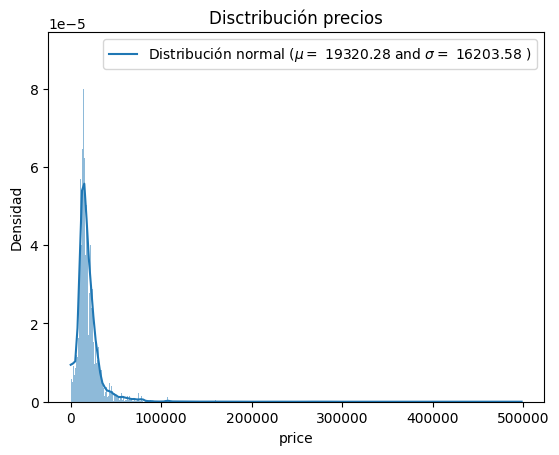

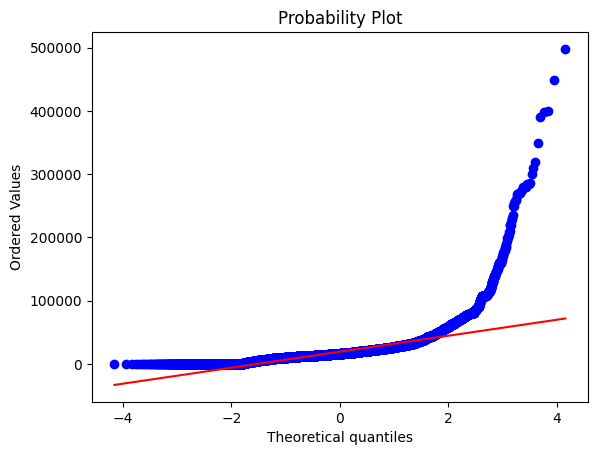

In [79]:
from scipy import stats

sns.histplot(df_final['price'], kde=True, stat="density", linewidth=0)  # Distribución de precios

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df_final['price'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Now plot the distribution
plt.legend(['Distribución normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Densidad')
plt.title('Disctribución precios')

# Mostramos QQ-plot
fig = plt.figure()
res = stats.probplot(df_final['price'], plot=plt)
plt.show()

In [80]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
year,42355.0,2016.688183,3.977171,1967.0,2015.0,2018.0,2019.0,2023.0
kms,42355.0,86415.262566,56204.475595,0.0,44000.0,80799.0,116712.0,1330000.0
power,42355.0,152.095597,1752.963259,0.0,102.0,126.0,150.0,360571.0
price,42355.0,19320.282729,16203.775595,0.0,12089.0,16290.0,22500.0,498000.0


# Model